## AG2 - ACTIVIDAD GUIADA 2
### Asignatura: Algoritmos de Optimización
### Laura Katherine Henao González

Repositorio GitHub:

### Descenso del Gradiente – AGD 

El procedimiento parte de un punto p como solución aproximada y da pasos en el sentido opuesto al gradiente (si minimizamos) de la función en dicho punto. p_t+1=p_t-α_t ∇f(p_t)

Donde el parámetro α_t se selecciona 
para que sea solución p_t+1
y f(p_t )≥f(p_t+1)



In [17]:
# Preparar entorno 

import math
import matplotlib.pyplot as plt 
import numpy as np

import random

Soución: [2.3774249882025738e-23, 3.073388515320884e-23] 1.5097866540636317e-45


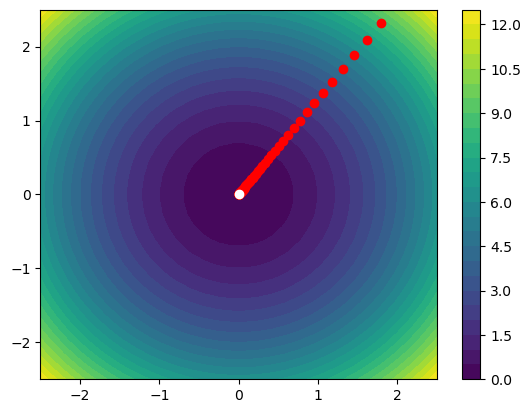

In [37]:
# La función a minimizar. Paraboloide
f = lambda X:       X[0]**2+X[1]**2    #función
df= lambda X:       [2*X[0], 2*X[1]]   #Gradiente

# Preparas los datos para dibujar mapara de niveles de Z

resolucion = 30
rango = 2.5
X = np.linspace(-rango,rango,resolucion)
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion,resolucion))

for ix,x in enumerate(X):
    for iy,y in enumerate(Y):
        Z[iy,ix] = f([x,y])
        
# Pintar el mapa de niveles de Z
contour = plt.contourf(X,Y,Z,resolucion)
cbar = plt.colorbar()

# Generar un punto de partida aleatorio 

P=[random.uniform(-rango, rango), random.uniform(-rango,rango)]
plt.plot(P[0],P[1],"o", c="red")

# Iterar el algoritmo 
#Tasa de aprenidzaje 
TA = 0.05

#Iteraciones 
for _ in range(500):
    grad = df(P)
    #print(P, grad)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c = "red")
    
# Gráfico con las iteraciones
plt.plot(P[0], P[1], "o", c = "white")
print("Soución:",P,f(P))


### Descenso del gradiente. 
Practica para mejorar nota: - Minimizar la función por descenso del gradiente 

f(x)=sin⁡(1/2*x^2-1/4*y^2+3)*cos⁡(2*x+1-e^y)


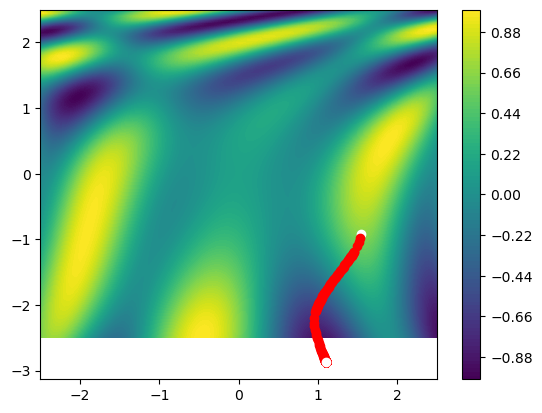

La solución es [1.0976545751494304, -2.8629649430809607] con un valor de -0.9998408851237627


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# La función a minimizar
f = lambda X: math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2 * X[0] + 1 - math.exp(X[1]))

# Gradiente de la función
def df(PUNTO):
    h=0.01
    T=np.copy(PUNTO)
    grad=np.zeros(2)
    for it, th in enumerate(PUNTO):
        T[it] = T[it]+h
        grad[it]=(f(T)-f(PUNTO))/h
    return grad

# Preparar los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pintar el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generar un punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje
TA = 0.1

# Iteraciones
for _ in range(5000):
    grad = df(P)
    # Adapta la tasa de aprendizaje
    r = math.sqrt(grad[0]**2 + grad[1]**2)
    if r < 1:
        TA = 0.1
    elif r < 5:
        TA = 0.01
    else:
        TA = 0.001
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="white")
plt.show()
print("La solución es", P, "con un valor de", f(P))



Este código adapta la tasa de aprendizaje en función de la magnitud del gradiente: cuando el gradiente es pequeño (menor que 1), la tasa de aprendizaje es 0.1; cuando el gradiente es moderado (entre 1 y 5), la tasa de aprendizaje es 0.01; cuando el gradiente es grande (mayor que 5), la tasa de aprendizaje es 0.001. Esto asegura que el algoritmo de descenso del gradiente toma pasos más grandes cuando está lejos del mínimo y pasos más pequeños cuando está cerca del mínimo.